# **Spam Detectiokn using Multinomial Naive Bayes**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("sms_spam.csv")
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.columns = ["Category", "Message"]

In [4]:
df.shape

(5574, 2)

In [5]:
df.sample(2)

,Category,Message
4847,ham,Pls help me tell Ashley that i cant find her n...
62,ham,Its a part of checking IQ


In [6]:
df.Category.value_counts()

Category
ham     4827
spam     747
Name: count, dtype: int64

In [7]:
def check_spam(x):
  if(x == "spam"):
    return 1
  else:
    return 0

In [8]:
# Create a Spam Column

df["Spam"] = df["Category"].apply(check_spam)

In [9]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Spam, test_size = 0.2, random_state=42)

In [11]:
X_train.shape, type(X_train)

((4459,), pandas.core.series.Series)

In [12]:
X_train[:4]

1350    FREE2DAY sexy St George's Day pic of Jordan!Tx...
5544             Armand says get your ass over to epsilon
1168              Lol now I'm after that hot air balloon!
5551    You know, wot people wear. T shirts, jumpers, ...
Name: Message, dtype: object

In [13]:
y_train[:4]

1350    1
5544    0
1168    0
5551    0
Name: Spam, dtype: int64

In [14]:
type(X_train.values)

numpy.ndarray

# **Apply CountVectorizer()** for making bag of words matrix


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vec = CountVectorizer()

X_train_cv = vec.fit_transform(X_train)
X_test_cv = vec.transform(X_test)
X_train_cv

<4459x7726 sparse matrix of type '<class 'numpy.int64'>'
	with 58995 stored elements in Compressed Sparse Row format>

In [17]:

# Count vectorizer creates a sparse matrix of 7726 column

X_train_cv.shape

(4459, 7726)

In [18]:
X_train_cv.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
vec.get_feature_names_out()[2968]

'free2day'

In [20]:
list(vec.vocabulary_)[:10]

['free2day', 'sexy', 'st', 'george', 'day', 'pic', 'of', 'jordan', 'txt', 'to']

In [21]:
vec.vocabulary_

{'free2day': 2968,
 'sexy': 6034,
 'st': 6410,
 'george': 3098,
 'day': 2175,
 'pic': 5190,
 'of': 4875,
 'jordan': 3827,
 'txt': 7073,
 'to': 6910,
 '89080': 717,
 'dont': 2403,
 'miss': 4500,
 'out': 4992,
 'then': 6803,
 'every': 2646,
 'wk': 7541,
 'saucy': 5905,
 'celeb': 1708,
 'more': 4574,
 'pics': 5195,
 'pocketbabe': 5272,
 'co': 1882,
 'uk': 7100,
 '0870241182716': 83,
 'armand': 1071,
 'says': 5917,
 'get': 3102,
 'your': 7694,
 'ass': 1109,
 'over': 5009,
 'epsilon': 2608,
 'lol': 4165,
 'now': 4827,
 'after': 860,
 'that': 6789,
 'hot': 3483,
 'air': 889,
 'balloon': 1221,
 'you': 7688,
 'know': 3938,
 'wot': 7593,
 'people': 5130,
 'wear': 7406,
 'shirts': 6081,
 'jumpers': 3846,
 'hat': 3332,
 'belt': 1324,
 'is': 3728,
 'all': 919,
 'we': 7402,
 'at': 1121,
 'cribbs': 2077,
 'good': 3173,
 'morning': 4578,
 'my': 4655,
 'love': 4208,
 'go': 3149,
 'sleep': 6201,
 'and': 969,
 'wish': 7524,
 'great': 3224,
 'full': 3023,
 'feeling': 2786,
 'better': 1338,
 'opportunity'

In [22]:
X_train_np = X_train_cv.toarray()

X_train_np.shape, X_train_np.ndim

((4459, 7726), 2)

In [23]:
X_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# **Apply Naive Bayes ML Algorithm**

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mnb = MultinomialNB()

mnb.fit(X_train_cv, y_train)

MultinomialNB()

In [26]:
mnb

MultinomialNB()

In [27]:
y_pred = mnb.predict(X_test_cv)

# **Compare the predicted value with the original data**

In [28]:
X_test[:4]


3690                            You still coming tonight?
3527    "HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...
724              Ya even those cookies have jelly on them
3370    Sorry i've not gone to that place. I.ll do so ...
Name: Message, dtype: object

In [29]:
# Check the Original DataFrame

df.iloc[3690]

Category                          ham
Message     You still coming tonight?
Spam                                0
Name: 3690, dtype: object

In [30]:
y_pred[0]

0

In [31]:
type(y_pred), y_pred.shape, y_pred.ndim

(numpy.ndarray, (1115,), 1)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       960
           1       0.93      0.97      0.95       155

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [33]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[949,  11],
       [  5, 150]], dtype=int64)

<Axes: >

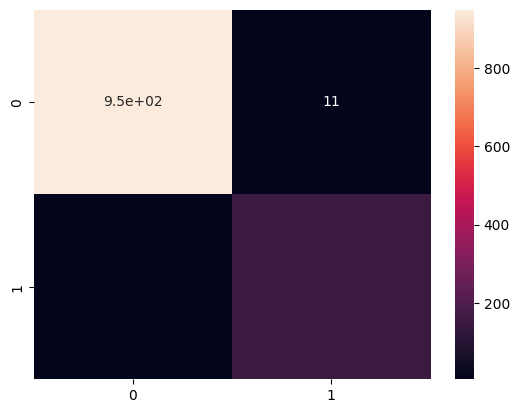

In [34]:
import seaborn as sns

sns.heatmap(cm, annot=True)

# **Cheacking With Some Random Email**

In [35]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'I am from India and i can help you.'
]

vec_email = vec.transform(emails)
mnb.predict(vec_email)

array([0, 1, 0], dtype=int64)

In [36]:
import pickle

pickle.dump(vec, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
